In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget "https://www.designbuild-network.com/wp-content/uploads/sites/21/2019/10/CH-View-2-05-800.jpg"

--2020-09-17 04:57:44--  https://www.designbuild-network.com/wp-content/uploads/sites/21/2019/10/CH-View-2-05-800.jpg
Resolving www.designbuild-network.com (www.designbuild-network.com)... 23.185.0.4, 2620:12a:8000::4, 2620:12a:8001::4
Connecting to www.designbuild-network.com (www.designbuild-network.com)|23.185.0.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274403 (268K) [image/jpeg]
Saving to: ‘CH-View-2-05-800.jpg’

CH-View-2-05-800.jp 100%[===================>] 267.97K  --.-KB/s    in 0.08s   

2020-09-17 04:57:45 (3.33 MB/s) - ‘CH-View-2-05-800.jpg’ saved [274403/274403]



In [ ]:
from matplotlib.image import imread

In [ ]:
img=imread("/content/CH-View-2-05-800.jpg")

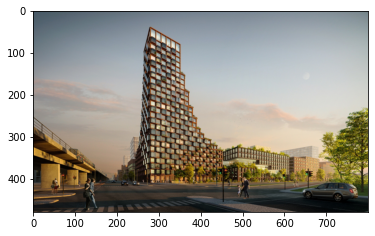

In [ ]:
plt.imshow(img)

In [ ]:
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

In [ ]:
img.shape,X.shape

((480, 800, 3), (384000, 3))

In [ ]:
import numpy as np

In [ ]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
km = KMeans(n_clusters=30)
%time km.fit(X)

CPU times: user 56.2 s, sys: 8.01 s, total: 1min 4s
Wall time: 54.5 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
np.unique(km.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)

In [ ]:
X_compressed = km.cluster_centers_[km.labels_]

In [ ]:
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)
X_compressed

array([[ 86, 100, 109],
       [ 86, 100, 109],
       [ 86, 100, 109],
       ...,
       [ 67,  63,  57],
       [ 67,  63,  57],
       [ 67,  63,  57]], dtype=uint8)

In [ ]:
X_compressed.shape

(384000, 3)

In [ ]:
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

In [ ]:
X_compressed.shape

(480, 800, 3)

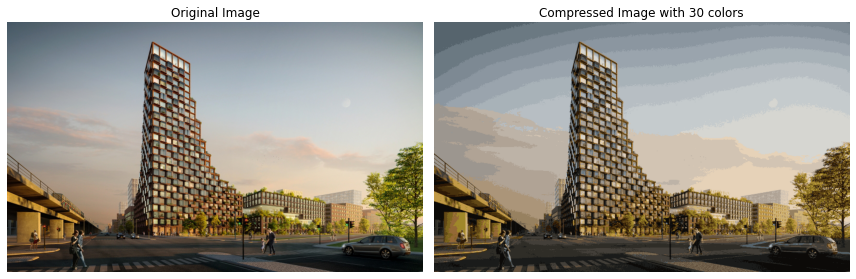

In [ ]:
# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();